In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv("powerconsumption(1).csv")

In [9]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [10]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [11]:
df.drop_duplicates()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [12]:
independent_vars = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
dependent_vars = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']

In [13]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')  # Infer format, coerce errors to NaT
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month

In [14]:
if df[['Hour', 'DayOfWeek', 'Month']].isna().sum().sum() > 0:
    print("Warning: Missing values in Datetime-derived columns. Filling with 0.")
    df[['Hour', 'DayOfWeek', 'Month']] = df[['Hour', 'DayOfWeek', 'Month']].fillna(0)

In [15]:
dependent_vars.extend(['Hour', 'DayOfWeek', 'Month'])

In [16]:
X = df[independent_vars]
y = df[dependent_vars]

In [17]:
if X.isna().sum().sum() > 0 or y.isna().sum().sum() > 0:
    print("Warning: Missing values detected in X or y. Dropping rows with missing values.")
    combined = pd.concat([X, y], axis=1).dropna()
    X = combined[independent_vars]
    y = combined[dependent_vars]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = model.predict(x_test)

In [21]:
print("Model Evaluation:")
mse = []
for i, var in enumerate(dependent_vars):
    mse_var = np.mean((y_test.iloc[:, i] - y_pred[:, i]) ** 2)
    mse.append(mse_var)
    print(f"Mean Squared Error for {var}: {mse_var:.4f}")

Model Evaluation:
Mean Squared Error for Temperature: 25.7129
Mean Squared Error for Humidity: 220.3809
Mean Squared Error for WindSpeed: 5.0532
Mean Squared Error for GeneralDiffuseFlows: 66189.1492
Mean Squared Error for DiffuseFlows: 14967.6363
Mean Squared Error for Hour: 21.4689
Mean Squared Error for DayOfWeek: 3.9277
Mean Squared Error for Month: 6.8851


In [22]:
print("\nModel coefficients for each output variable:")
for i, var in enumerate(dependent_vars):
    print(f"\nCoefficients for {var}:")
    for j, input_var in enumerate(independent_vars):
        print(f"  {input_var}: {model.coef_[i][j]:.4f}")


Model coefficients for each output variable:

Coefficients for Temperature:
  PowerConsumption_Zone1: 0.0000
  PowerConsumption_Zone2: 0.0001
  PowerConsumption_Zone3: 0.0003

Coefficients for Humidity:
  PowerConsumption_Zone1: -0.0002
  PowerConsumption_Zone2: -0.0006
  PowerConsumption_Zone3: -0.0001

Coefficients for WindSpeed:
  PowerConsumption_Zone1: -0.0001
  PowerConsumption_Zone2: 0.0000
  PowerConsumption_Zone3: 0.0001

Coefficients for GeneralDiffuseFlows:
  PowerConsumption_Zone1: 0.0133
  PowerConsumption_Zone2: -0.0017
  PowerConsumption_Zone3: -0.0075

Coefficients for DiffuseFlows:
  PowerConsumption_Zone1: 0.0063
  PowerConsumption_Zone2: -0.0028
  PowerConsumption_Zone3: -0.0046

Coefficients for Hour:
  PowerConsumption_Zone1: 0.0007
  PowerConsumption_Zone2: 0.0002
  PowerConsumption_Zone3: -0.0002

Coefficients for DayOfWeek:
  PowerConsumption_Zone1: 0.0000
  PowerConsumption_Zone2: -0.0001
  PowerConsumption_Zone3: 0.0000

Coefficients for Month:
  PowerConsump

In [23]:
actual_temp = y_test['Temperature'].values
predicted_temp = y_pred[:, dependent_vars.index('Temperature')]

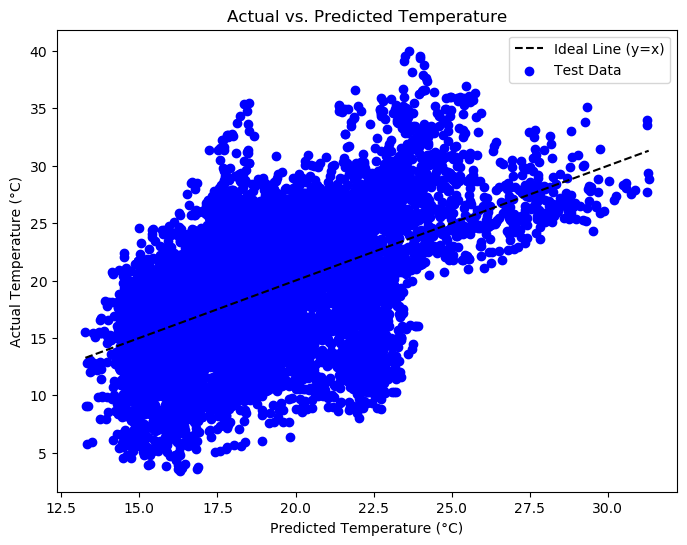

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(predicted_temp, actual_temp, color="blue", label="Test Data")
plt.plot([min(predicted_temp), max(predicted_temp)], [min(predicted_temp), max(predicted_temp)], 
         color="black", linestyle="--", label="Ideal Line (y=x)")
plt.xlabel("Predicted Temperature (°C)")
plt.ylabel("Actual Temperature (°C)")
plt.title("Actual vs. Predicted Temperature")
plt.legend()
plt.show()

In [26]:
power_zone1 = x_test['PowerConsumption_Zone1'].values
temp = y_test['Temperature'].values

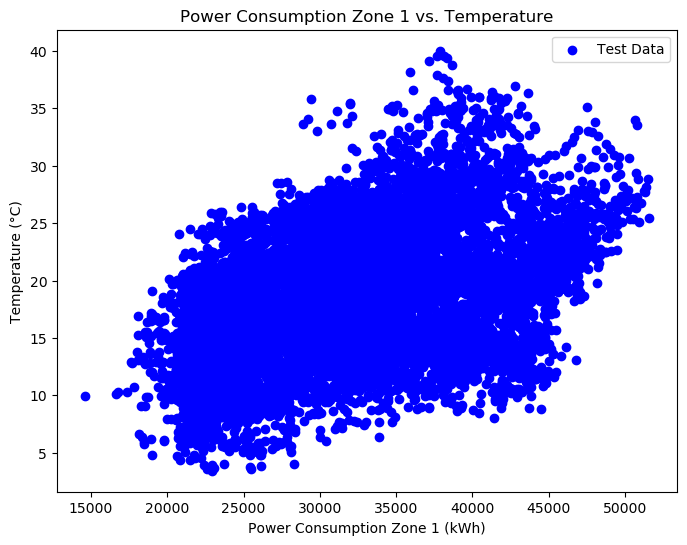

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(power_zone1, temp, color="blue", label="Test Data")
plt.xlabel("Power Consumption Zone 1 (kWh)")
plt.ylabel("Temperature (°C)")
plt.title("Power Consumption Zone 1 vs. Temperature")
plt.legend()
plt.show()